In [1]:
#importing libraries
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

#load dataset
dataset = pd.read_csv("C:/Users/RP2 User/Downloads/Dataset-Mental-Disorders (4).csv")

In [2]:
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [4]:
dataset.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


<Axes: xlabel='Expert Diagnose', ylabel='count'>

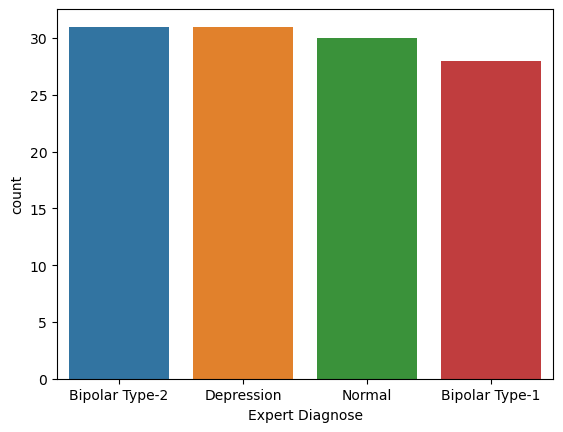

In [5]:
sns.countplot(x = 'Expert Diagnose', data=dataset, order = dataset['Expert Diagnose'].value_counts().index)
#checking data is balenced or not

In [6]:
#convertion of numericals using replace()fnctn

dataset["Sexual Activity"]=dataset["Sexual Activity"].str.replace("From 10",'')
dataset["Concentration"]=dataset["Concentration"].str.replace("From 10",'')
dataset["Optimisim"]=dataset["Optimisim"].str.replace("From 10",'')

dataset.drop(["Patient Number"],axis=1)




,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2,5,3,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6,7,8,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1,5,3,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7,7,7,Depression


In [7]:
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2,5,3,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6,7,8,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1,5,3,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7,7,7,Depression


In [8]:
dataset


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2,5,3,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6,7,8,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1,5,3,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7,7,7,Depression


In [9]:

# Import label encoder 
from sklearn.preprocessing import LabelEncoder 

column_to_encode=dataset.iloc[:,4:15]
# label_encoder object knows  
# how to understand word labels. 
label_encoder = LabelEncoder() 
for col in column_to_encode:
 
     dataset[col]= label_encoder.fit_transform(dataset[col]) 

In [10]:
# !pip install dtale

In [11]:
# import pandas as pd
# import dtale

In [12]:
# dataset= pd.read_csv("C:/Users/RP2 User/Downloads/df_disorder_edited.csv")


In [13]:
# dtale.show(dataset)

In [14]:
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,2,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,2,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,2,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,0,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,2,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,2,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,1,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,2,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,1,0,1,1,0,1,1,1,0,1,1,7,7,7,Depression


In [15]:
#encoding-label encoding

column_to_encode=dataset.iloc[:,0:4]
# label_encoder object knows  
# how to understand word labels. 
label_encoder = LabelEncoder() 
for col in column_to_encode:
 
     dataset[col]= label_encoder.fit_transform(dataset[col]) 

In [16]:
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,27,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
116,28,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
117,29,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2
118,30,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,Depression


In [17]:
dataset['Expert Diagnose'].unique()

array(['Bipolar Type-2', 'Depression', 'Bipolar Type-1', 'Normal'],
      dtype=object)

In [18]:
ed= {'Bipolar Type-1':0,'Depression':1,'Bipolar Type-2':2,'Normal':3}
dataset['Expert Diagnose'] = dataset['Expert Diagnose'].map(ed) # mapping for the column expert diagnose

In [19]:
dataset.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,3


In [20]:
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,27,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,1
116,28,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,0
117,29,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,2
118,30,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,1


In [21]:
dataset.drop(["Patient Number"],axis=1) #deleting column patient number

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,1
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,0
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,2
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,1


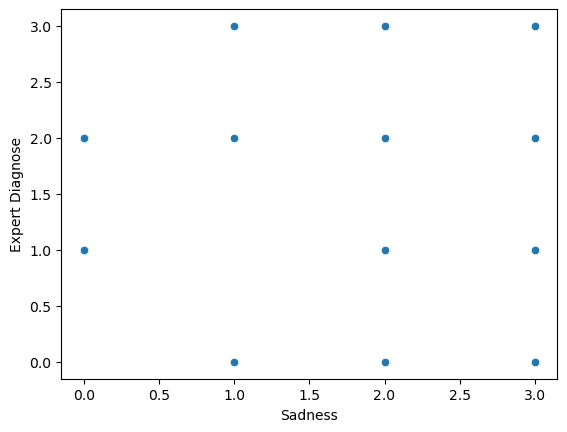

In [22]:
#scatterplot
sns.scatterplot(data=dataset,x=dataset["Sadness"], y=dataset["Expert Diagnose"])
plt.show()

In [23]:
dataset.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.500000,1.883333,1.633333,1.633333,1.758333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,1.525000
std,34.785054,1.070485,0.849452,1.144467,1.053173,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,1.107366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.750000,1.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,59.500000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,89.250000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000
max,119.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


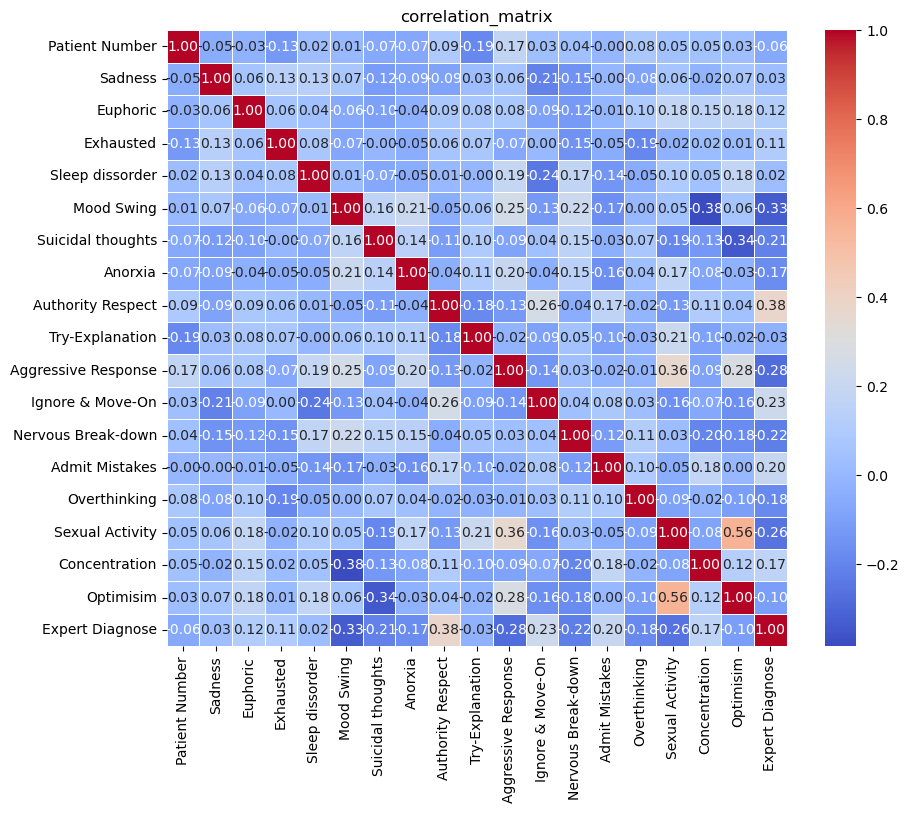

In [38]:
#checking corelation
correlation_matrix = dataset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('correlation_matrix')
plt.show()

Testing

In [39]:
x = dataset.iloc[:,0:18].values
y = dataset.iloc[:,18].values

In [26]:
x

array([[0, 3, 1, ..., '3 ', '3 ', '4 '],
       [1, 3, 1, ..., '4 ', '2 ', '5 '],
       [2, 2, 0, ..., '6 ', '5 ', '7 '],
       ...,
       [29, 3, 2, ..., '1 ', '5 ', '3 '],
       [30, 3, 2, ..., '7 ', '7 ', '7 '],
       [32, 2, 3, ..., '7 ', '3 ', '8 ']], dtype=object)

In [27]:
y

array([2, 1, 0, 2, 3, 1, 0, 3, 2, 1, 3, 0, 2, 3, 1, 0, 3, 0, 1, 3, 2, 0,
       3, 1, 2, 3, 3, 1, 2, 3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 2, 1, 2, 3, 0,
       1, 2, 3, 2, 0, 1, 3, 2, 1, 0, 2, 3, 0, 0, 1, 3, 2, 1, 0, 2, 3, 1,
       3, 0, 2, 0, 1, 2, 0, 3, 2, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 1, 0,
       0, 3, 1, 2, 3, 0, 1, 2, 0, 3, 1, 2, 0, 1, 0, 3, 2, 1, 3, 1, 2, 1,
       3, 2, 0, 2, 3, 1, 0, 2, 1, 3], dtype=int64)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [29]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (84, 18)
y_train:  (84,)
x_test:  (36, 18)
y_test:  (36,)


logestic regression

In [40]:
# data modeling
# logestic regresion
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter = 600)

In [41]:
model_lr.fit(x_train, y_train)

C:\Users\RP2 User\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [42]:
y_pred_lr = model_lr.predict(x_test)

In [43]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.8611111111111112


## random forest

In [44]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [47]:
y_pred_rf = model_rf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.8611111111111112


## knn classifier

In [48]:
#data modeling
#knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [49]:
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)

In [50]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.05555555555555555


## decision tree

In [71]:
#data modeling
#decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [72]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred_dt = model_dt.predict(x_test)

In [74]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8611111111111112


## decision tree classification is more accurate

## naive bayes

In [66]:
#data modeling
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [67]:
model_nb = GaussianNB()

In [68]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [69]:
y_pred_nb = model_nb.predict(x_test)

In [70]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8333333333333334


## svm

In [55]:
#svc
from sklearn.svm import SVC
model_svm = SVC(gamma='auto')
model_svm.fit(x_train,y_train)

SVC(gamma='auto')

In [56]:
y_pred_svm = model_svm.predict(x_test)

In [58]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svm))

Accuracy :  0.1111111111111111


In [59]:
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,1
2,2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,27,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,1
116,28,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,0
117,29,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,2
118,30,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,1


## scaling

In [63]:
# min max normalization # here there is no outleirs therefore no need of standardization 
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler() 
data_rescaled = data_scaler.fit_transform(x)

In [64]:
from numpy import set_printoptions 
set_printoptions(precision=1)
print ("\nScaled data:\n", data_rescaled[0:10])


Scaled data:
 [[0.  1.  0.3 0.7 0.7 1.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.2 0.3 0.4]
 [0.  1.  0.3 1.  0.7 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.1 0.5]
 [0.  0.7 0.  0.7 0.7 1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.6 0.6 0.8]
 [0.  1.  0.3 1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.2 0.1 0.1]
 [0.  1.  1.  0.7 0.7 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.5 0.6 0.6]
 [0.  1.  0.7 0.7 0.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.2 0.6 0.5]
 [0.1 0.3 1.  0.3 0.7 1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.8 0.1 1. ]
 [0.1 1.  0.7 0.7 0.7 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.5 0.6 0.5]
 [0.1 0.  0.3 0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.9 0.1 0.2]
 [0.1 1.  0.3 0.  0.7 0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.2 0.4 0.1]]


## spliting

In [79]:
x1 = data_rescaled
y = dataset.iloc[:,18].values
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.3, random_state = 10)
# data modeling
# logestic regresion

model_lr = LogisticRegression(max_iter = 600)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.9444444444444444


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train,y_train)

In [80]:
y_pred_rf = model_rf.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.6666666666666666


In [81]:
#data modeling
#knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [82]:
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)

In [83]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7222222222222222


In [84]:
#data modeling
#decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [85]:
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)

In [86]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8333333333333334


In [87]:
#data modeling
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [88]:
model_nb = GaussianNB()

In [89]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [90]:
y_pred_nb = model_nb.predict(x_test)

In [91]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.7222222222222222


In [92]:
#svc
from sklearn.svm import SVC
model_svm = SVC(gamma='auto')
model_svm.fit(x_train,y_train)

SVC(gamma='auto')

In [93]:
y_pred_svm = model_svm.predict(x_test)

In [94]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svm))

Accuracy :  0.8611111111111112
